In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [198]:
data = pd.read_csv('GOI.csv')
data.head()

,Category,Country/ States/ Union Territories Name,Literacy Rate (Persons) - Total - 2001,Literacy Rate (Persons) - Total - 2011,Literacy Rate (Persons) - Rural - 2001,Literacy Rate (Persons) - Rural - 2011,Literacy Rate (Persons) - Urban - 2001,Literacy Rate (Persons) - Urban - 2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [199]:
new_names = {'Country/ States/ Union Territories Name': 'Country/States/UTs', 'Literacy Rate (Persons) - Total - 2001': 'Literacy_total_2001', 'Literacy Rate (Persons) - Total - 2011': 'Literacy_total_2011', 'Literacy Rate (Persons) - Rural - 2001': 'Literacy_rural_2001', 'Literacy Rate (Persons) - Rural - 2011': 'Literacy_rural_2011', 'Literacy Rate (Persons) - Urban - 2001': 'Literacy_urban_2001', 'Literacy Rate (Persons) - Urban - 2011': 'Literacy_urban_2011'}
data = data.rename(columns = new_names)
data.head()

,Category,Country/States/UTs,Literacy_total_2001,Literacy_total_2011,Literacy_rural_2001,Literacy_rural_2011,Literacy_urban_2001,Literacy_urban_2011
0,Country,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,State,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,State,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,State,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,State,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


### Questions to answer from the data
1. In 2001, which states/UTs had highest overall, rural, and urban literacy rate in India?
2. In 2001, which states/UTs had lowest overall, rural, and urban literacy rate in India?
3. In 2011, which states/UTs had highest overall, rural, and urban literacy rate in India?
4. In 2011, which states/UTs had lowest overall, rural, and urban literacy rate in India?
5. Between 2001 and 2011, which states/UTs have improved more in overall, rural, and urban literacy rates?
6. Between 2001 and 2011, which states/UTs have improved less in overall, rural, and urban literacy rates?
7. Compare the literacy rates between north and south India
8. Compare the literacy rate improvements between north and south India

Text(0.5, 0.98, 'States vs Literacy Rates in 2001')

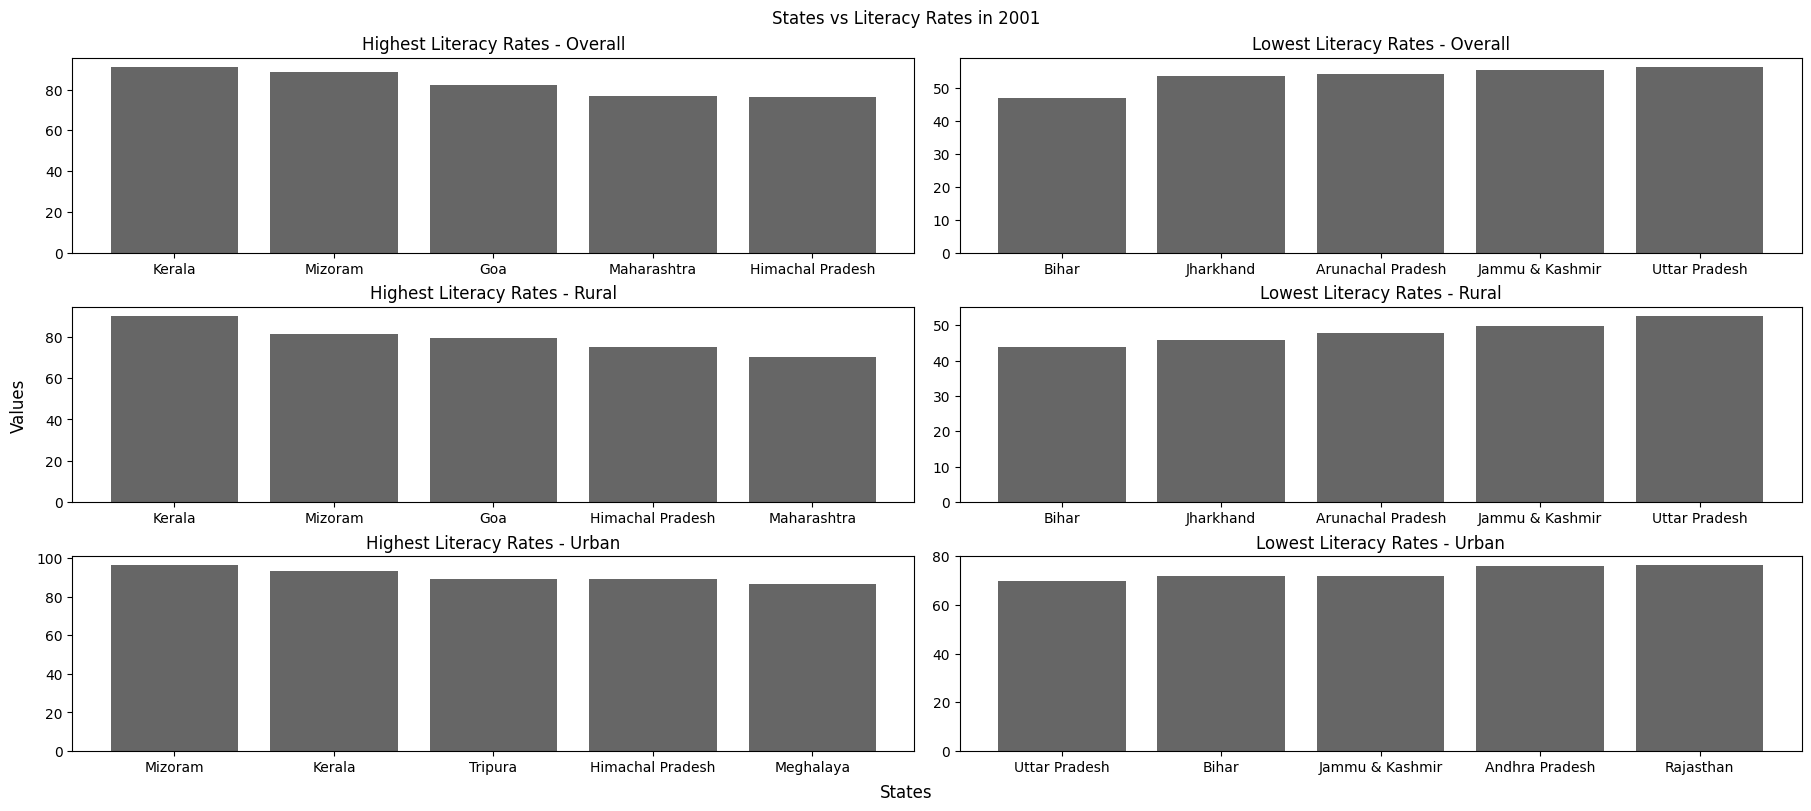

In [200]:
data_states = data[data['Category'] == 'State']
data_uts = data[data['Category'] == 'Union Territory']

state_highest_overall_2001 = data_states.sort_values(by = 'Literacy_total_2001', ascending = False)[['Country/States/UTs', 'Literacy_total_2001']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_total_2001': 'value'}).head(5)
state_highest_rural_2001 = data_states.sort_values(by = 'Literacy_rural_2001', ascending = False)[['Country/States/UTs', 'Literacy_rural_2001']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_rural_2001': 'value'}).head(5)
state_highest_urban_2001 = data_states.sort_values(by = 'Literacy_urban_2001', ascending = False)[['Country/States/UTs', 'Literacy_urban_2001']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_urban_2001': 'value'}).head(5)
state_lowest_overall_2001 = data_states.sort_values(by = 'Literacy_total_2001')[['Country/States/UTs', 'Literacy_total_2001']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_total_2001': 'value'}).head(5)
state_lowest_rural_2001 = data_states.sort_values(by = 'Literacy_rural_2001')[['Country/States/UTs', 'Literacy_rural_2001']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_rural_2001': 'value'}).head(5)
state_lowest_urban_2001 = data_states.sort_values(by = 'Literacy_urban_2001')[['Country/States/UTs', 'Literacy_urban_2001']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_urban_2001': 'value'}).head(5)

color_code = '0.4'
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 8), constrained_layout = True)
ax[0,0].bar(state_highest_overall_2001['State'], state_highest_overall_2001['value'], color=color_code)
ax[0,0].set_title('Highest Literacy Rates - Overall')
ax[0,1].bar(state_lowest_overall_2001['State'], state_lowest_overall_2001['value'], color=color_code)
ax[0,1].set_title('Lowest Literacy Rates - Overall')
ax[1,0].bar(state_highest_rural_2001['State'], state_highest_rural_2001['value'], color=color_code)
ax[1,0].set_title('Highest Literacy Rates - Rural')
ax[1,1].bar(state_lowest_rural_2001['State'], state_lowest_rural_2001['value'], color=color_code)
ax[1,1].set_title('Lowest Literacy Rates - Rural')
ax[2,0].bar(state_highest_urban_2001['State'], state_highest_urban_2001['value'], color=color_code)
ax[2,0].set_title('Highest Literacy Rates - Urban')
ax[2,1].bar(state_lowest_urban_2001['State'], state_lowest_urban_2001['value'], color=color_code)
ax[2,1].set_title('Lowest Literacy Rates - Urban')
fig.supxlabel('States')
fig.supylabel('Values')
fig.suptitle('States vs Literacy Rates in 2001')

Text(0.5, 0.98, 'UTs vs Literacy Rates in 2001')

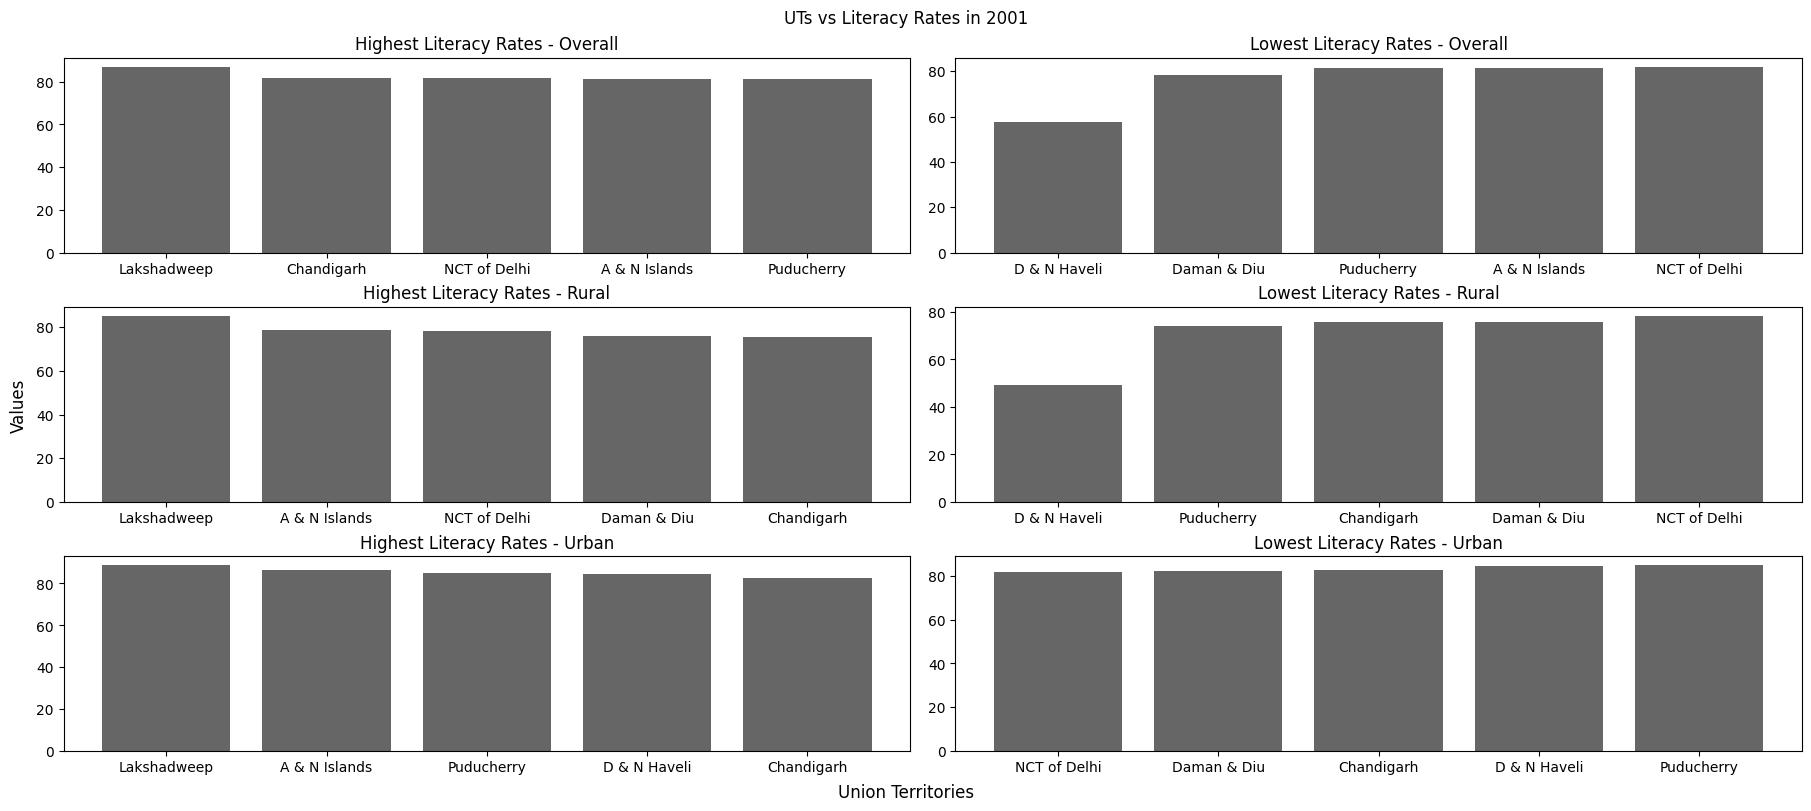

In [201]:
ut_highest_overall_2001 = data_uts.sort_values(by = 'Literacy_total_2001', ascending = False)[['Country/States/UTs', 'Literacy_total_2001']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_total_2001': 'value'}).head(5)
ut_highest_rural_2001 = data_uts.sort_values(by = 'Literacy_rural_2001', ascending = False)[['Country/States/UTs', 'Literacy_rural_2001']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_rural_2001': 'value'}).head(5)
ut_highest_urban_2001 = data_uts.sort_values(by = 'Literacy_urban_2001', ascending = False)[['Country/States/UTs', 'Literacy_urban_2001']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_urban_2001': 'value'}).head(5)
ut_lowest_overall_2001 = data_uts.sort_values(by = 'Literacy_total_2001')[['Country/States/UTs', 'Literacy_total_2001']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_total_2001': 'value'}).head(5)
ut_lowest_rural_2001 = data_uts.sort_values(by = 'Literacy_rural_2001')[['Country/States/UTs', 'Literacy_rural_2001']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_rural_2001': 'value'}).head(5)
ut_lowest_urban_2001 = data_uts.sort_values(by = 'Literacy_urban_2001')[['Country/States/UTs', 'Literacy_urban_2001']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_urban_2001': 'value'}).head(5)

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 8), constrained_layout = True)
ax[0,0].bar(ut_highest_overall_2001['UT'], ut_highest_overall_2001['value'], color=color_code)
ax[0,0].set_title('Highest Literacy Rates - Overall')
ax[0,1].bar(ut_lowest_overall_2001['UT'], ut_lowest_overall_2001['value'], color=color_code)
ax[0,1].set_title('Lowest Literacy Rates - Overall')
ax[1,0].bar(ut_highest_rural_2001['UT'], ut_highest_rural_2001['value'], color=color_code)
ax[1,0].set_title('Highest Literacy Rates - Rural')
ax[1,1].bar(ut_lowest_rural_2001['UT'], ut_lowest_rural_2001['value'], color=color_code)
ax[1,1].set_title('Lowest Literacy Rates - Rural')
ax[2,0].bar(ut_highest_urban_2001['UT'], ut_highest_urban_2001['value'], color=color_code)
ax[2,0].set_title('Highest Literacy Rates - Urban')
ax[2,1].bar(ut_lowest_urban_2001['UT'], ut_lowest_urban_2001['value'], color=color_code)
ax[2,1].set_title('Lowest Literacy Rates - Urban')
fig.supxlabel('Union Territories')
fig.supylabel('Values')
fig.suptitle('UTs vs Literacy Rates in 2001')

Text(0.5, 0.98, 'States vs Literacy Rates in 2011')

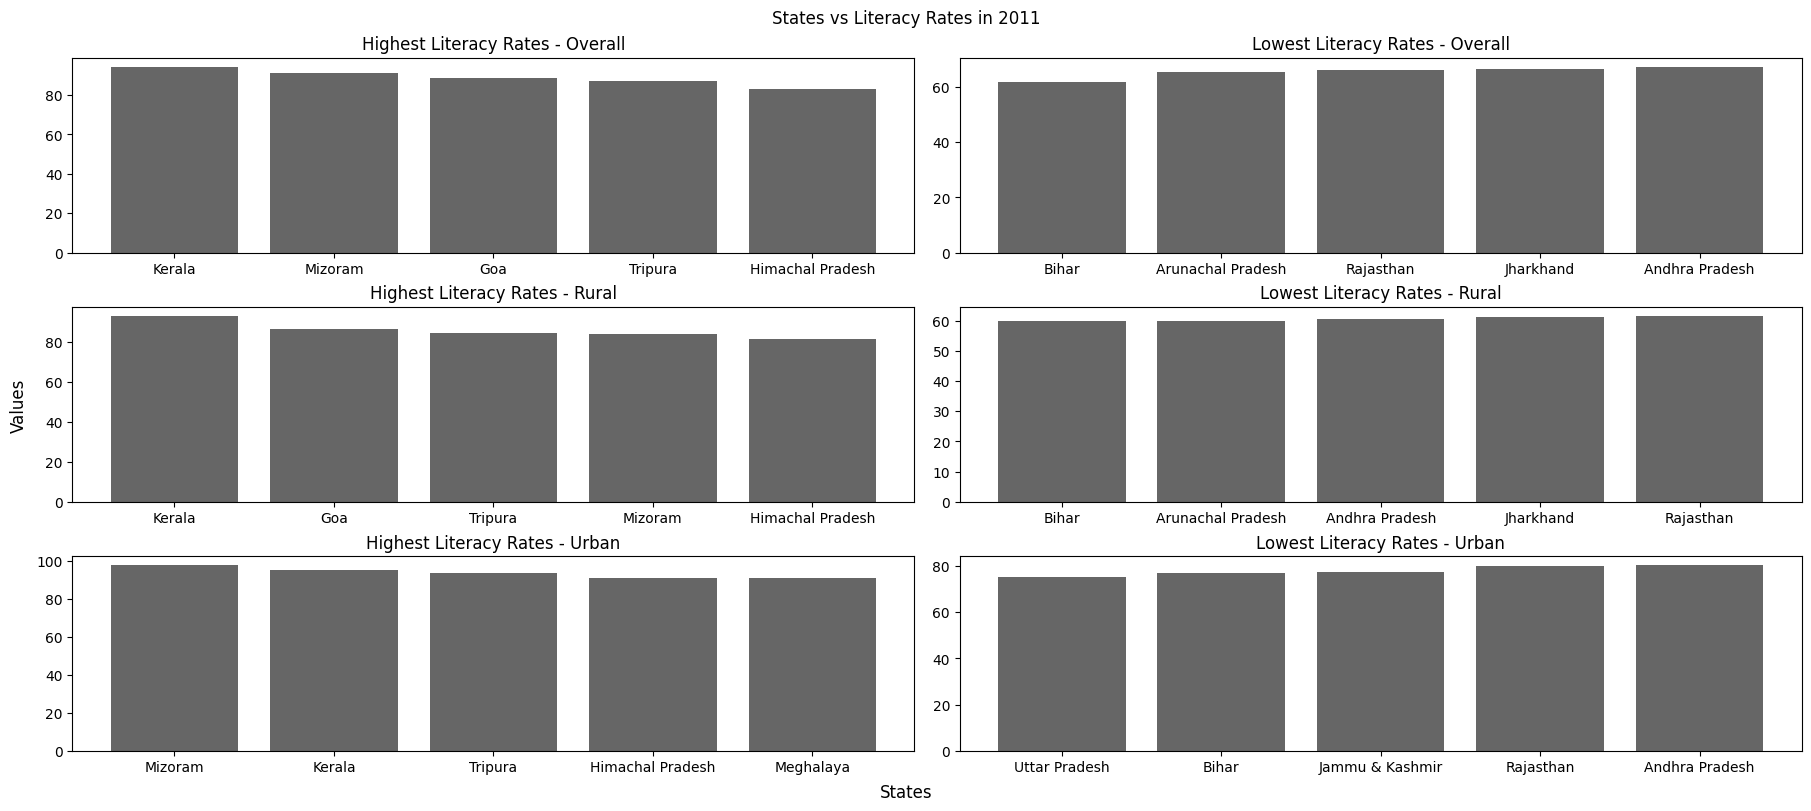

In [202]:
state_highest_overall_2011 = data_states.sort_values(by = 'Literacy_total_2011', ascending = False)[['Country/States/UTs', 'Literacy_total_2011']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_total_2011': 'value'}).head(5)
state_highest_rural_2011 = data_states.sort_values(by = 'Literacy_rural_2011', ascending = False)[['Country/States/UTs', 'Literacy_rural_2011']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_rural_2011': 'value'}).head(5)
state_highest_urban_2011 = data_states.sort_values(by = 'Literacy_urban_2011', ascending = False)[['Country/States/UTs', 'Literacy_urban_2011']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_urban_2011': 'value'}).head(5)
state_lowest_overall_2011 = data_states.sort_values(by = 'Literacy_total_2011')[['Country/States/UTs', 'Literacy_total_2011']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_total_2011': 'value'}).head(5)
state_lowest_rural_2011 = data_states.sort_values(by = 'Literacy_rural_2011')[['Country/States/UTs', 'Literacy_rural_2011']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_rural_2011': 'value'}).head(5)
state_lowest_urban_2011 = data_states.sort_values(by = 'Literacy_urban_2011')[['Country/States/UTs', 'Literacy_urban_2011']].rename(columns = {'Country/States/UTs': 'State', 'Literacy_urban_2011': 'value'}).head(5)

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 8), constrained_layout = True)
ax[0,0].bar(state_highest_overall_2011['State'], state_highest_overall_2011['value'], color=color_code)
ax[0,0].set_title('Highest Literacy Rates - Overall')
ax[0,1].bar(state_lowest_overall_2011['State'], state_lowest_overall_2011['value'], color=color_code)
ax[0,1].set_title('Lowest Literacy Rates - Overall')
ax[1,0].bar(state_highest_rural_2011['State'], state_highest_rural_2011['value'], color=color_code)
ax[1,0].set_title('Highest Literacy Rates - Rural')
ax[1,1].bar(state_lowest_rural_2011['State'], state_lowest_rural_2011['value'], color=color_code)
ax[1,1].set_title('Lowest Literacy Rates - Rural')
ax[2,0].bar(state_highest_urban_2011['State'], state_highest_urban_2011['value'], color=color_code)
ax[2,0].set_title('Highest Literacy Rates - Urban')
ax[2,1].bar(state_lowest_urban_2011['State'], state_lowest_urban_2011['value'], color=color_code)
ax[2,1].set_title('Lowest Literacy Rates - Urban')
fig.supxlabel('States')
fig.supylabel('Values')
fig.suptitle('States vs Literacy Rates in 2011')

Text(0.5, 0.98, 'UTs vs Literacy Rates in 2011')

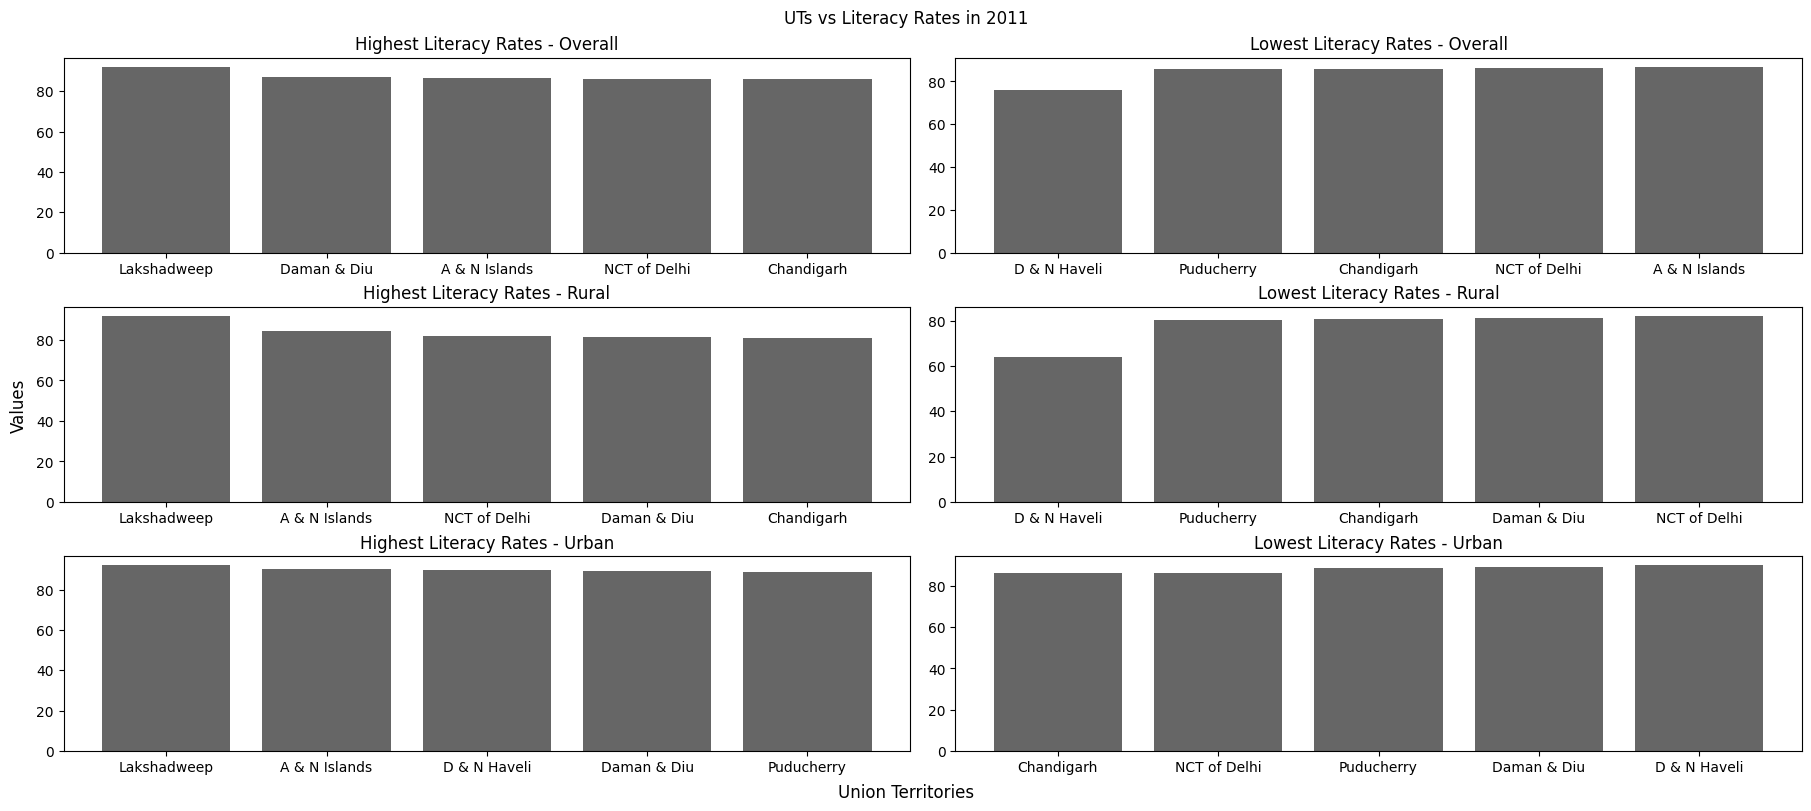

In [203]:
ut_highest_overall_2011 = data_uts.sort_values(by = 'Literacy_total_2011', ascending = False)[['Country/States/UTs', 'Literacy_total_2011']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_total_2011': 'value'}).head(5)
ut_highest_rural_2011 = data_uts.sort_values(by = 'Literacy_rural_2011', ascending = False)[['Country/States/UTs', 'Literacy_rural_2011']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_rural_2011': 'value'}).head(5)
ut_highest_urban_2011 = data_uts.sort_values(by = 'Literacy_urban_2011', ascending = False)[['Country/States/UTs', 'Literacy_urban_2011']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_urban_2011': 'value'}).head(5)
ut_lowest_overall_2011 = data_uts.sort_values(by = 'Literacy_total_2011')[['Country/States/UTs', 'Literacy_total_2011']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_total_2011': 'value'}).head(5)
ut_lowest_rural_2011 = data_uts.sort_values(by = 'Literacy_rural_2011')[['Country/States/UTs', 'Literacy_rural_2011']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_rural_2011': 'value'}).head(5)
ut_lowest_urban_2011 = data_uts.sort_values(by = 'Literacy_urban_2011')[['Country/States/UTs', 'Literacy_urban_2011']].rename(columns = {'Country/States/UTs': 'UT', 'Literacy_urban_2011': 'value'}).head(5)

fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 8), constrained_layout = True)
ax[0,0].bar(ut_highest_overall_2011['UT'], ut_highest_overall_2011['value'], color=color_code)
ax[0,0].set_title('Highest Literacy Rates - Overall')
ax[0,1].bar(ut_lowest_overall_2011['UT'], ut_lowest_overall_2011['value'], color=color_code)
ax[0,1].set_title('Lowest Literacy Rates - Overall')
ax[1,0].bar(ut_highest_rural_2011['UT'], ut_highest_rural_2011['value'], color=color_code)
ax[1,0].set_title('Highest Literacy Rates - Rural')
ax[1,1].bar(ut_lowest_rural_2011['UT'], ut_lowest_rural_2011['value'], color=color_code)
ax[1,1].set_title('Lowest Literacy Rates - Rural')
ax[2,0].bar(ut_highest_urban_2011['UT'], ut_highest_urban_2011['value'], color=color_code)
ax[2,0].set_title('Highest Literacy Rates - Urban')
ax[2,1].bar(ut_lowest_urban_2011['UT'], ut_lowest_urban_2011['value'], color=color_code)
ax[2,1].set_title('Lowest Literacy Rates - Urban')
fig.supxlabel('Union Territories')
fig.supylabel('Values')
fig.suptitle('UTs vs Literacy Rates in 2011')

In [204]:
data_states['Literacy_total_improvements in 2011'] = data_states['Literacy_total_2011'] - data_states['Literacy_total_2001']
data_states['Literacy_rural_improvements in 2011'] = data_states['Literacy_rural_2011'] - data_states['Literacy_rural_2001']
data_states['Literacy_urban_improvements in 2011'] = data_states['Literacy_urban_2011'] - data_states['Literacy_urban_2001']

data_states_total_improv_sorted = data_states.sort_values(by = 'Literacy_total_improvements in 2011', ascending=False)[['Country/States/UTs', 'Literacy_total_2001', 'Literacy_total_improvements in 2011']]
data_states_rural_improv_sorted = data_states.sort_values(by = 'Literacy_rural_improvements in 2011', ascending=False)[['Country/States/UTs', 'Literacy_rural_2001', 'Literacy_rural_improvements in 2011']]
data_states_urban_improv_sorted = data_states.sort_values(by = 'Literacy_urban_improvements in 2011', ascending=False)[['Country/States/UTs', 'Literacy_urban_2001', 'Literacy_urban_improvements in 2011']]

Top 5 Improvements in Total Literacy Rates (Rural + Urban) in States



(0.0, 100.0)

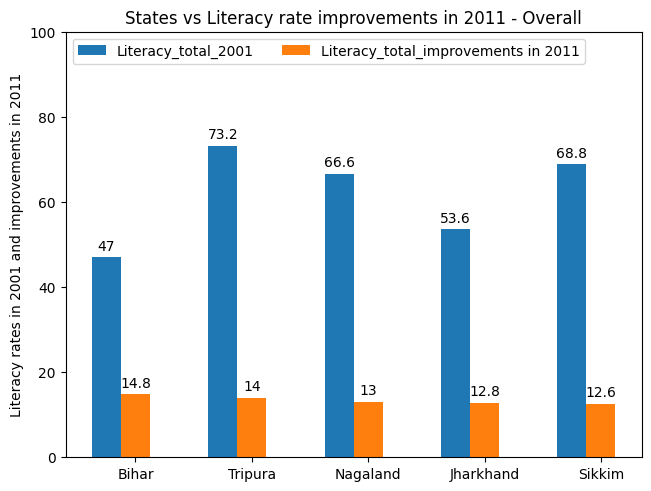

In [205]:
print('Top 5 Improvements in Total Literacy Rates (Rural + Urban) in States\n')
data_states_total_improv_sub = data_states_total_improv_sorted.head()[['Literacy_total_2001', 'Literacy_total_improvements in 2011']]
data_states_total_improv_sub_states = data_states_total_improv_sorted.head()['Country/States/UTs']
x = np.arange(5)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_states_total_improv_sub.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Literacy rates in 2001 and improvements in 2011')
ax.set_title('States vs Literacy rate improvements in 2011 - Overall')
ax.set_xticks(x + width, data_states_total_improv_sub_states)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 100)

Top 5 Improvements in Rural Literacy Rates in States



(0.0, 100.0)

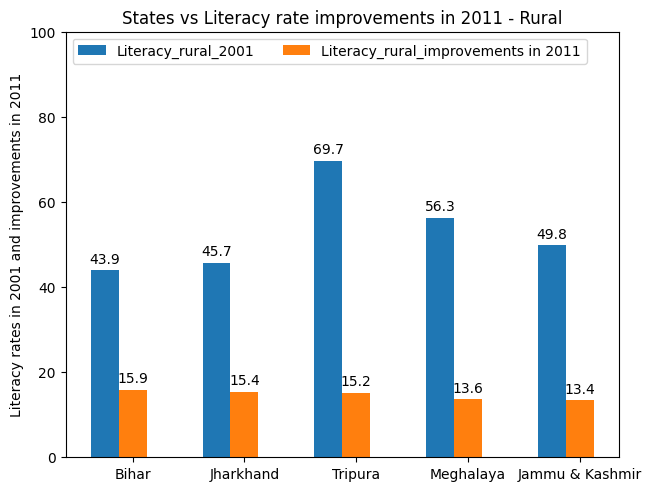

In [206]:
print('Top 5 Improvements in Rural Literacy Rates in States\n')
data_states_rural_improv_sub = data_states_rural_improv_sorted.head()[['Literacy_rural_2001', 'Literacy_rural_improvements in 2011']]
data_states_rural_improv_sub_states = data_states_rural_improv_sorted.head()['Country/States/UTs']

x = np.arange(5)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_states_rural_improv_sub.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Literacy rates in 2001 and improvements in 2011')
ax.set_title('States vs Literacy rate improvements in 2011 - Rural')
ax.set_xticks(x + width, data_states_rural_improv_sub_states)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 100)

Top 5 Improvements in Urban Literacy Rates in States



(0.0, 100.0)

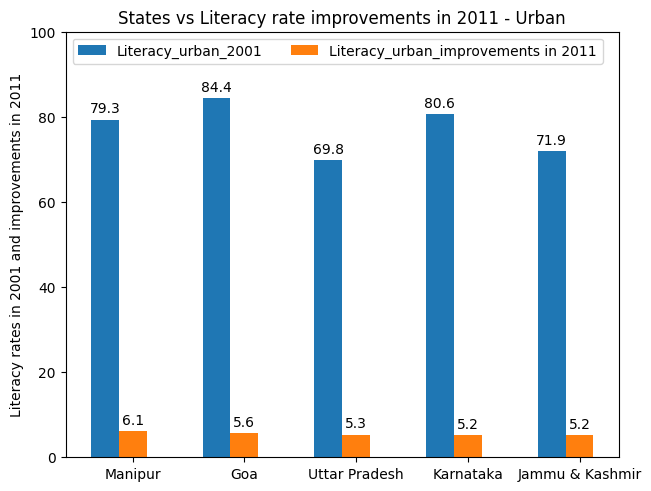

In [207]:
print('Top 5 Improvements in Urban Literacy Rates in States\n')
data_states_urban_improv_sub = data_states_urban_improv_sorted.head()[['Literacy_urban_2001', 'Literacy_urban_improvements in 2011']]
data_states_urban_improv_sub_states = data_states_urban_improv_sorted.head()['Country/States/UTs']

x = np.arange(5)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in data_states_urban_improv_sub.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Literacy rates in 2001 and improvements in 2011')
ax.set_title('States vs Literacy rate improvements in 2011 - Urban')
ax.set_xticks(x + width, data_states_urban_improv_sub_states)
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 100)

In [208]:
print('Bottom 5 Improvements in Total Literacy Rates (Rural + Urban) in States\n')
data_states_total_improv_sorted.tail().sort_values(by = 'Literacy_total_improvements in 2011', ascending = True)

Bottom 5 Improvements in Total Literacy Rates (Rural + Urban) in States



,Country/States/UTs,Literacy_total_2001,Literacy_total_improvements in 2011
18,Mizoram,88.8,2.5
13,Kerala,90.9,3.1
15,Maharashtra,76.9,5.4
14,Madhya Pradesh,63.7,5.6
5,Chhattisgarh,64.7,5.6


In [209]:
print('Bottom 5 Improvements in Rural Literacy Rates in States\n')
data_states_rural_improv_sorted.tail().sort_values(by = 'Literacy_rural_improvements in 2011', ascending = True)

Bottom 5 Improvements in Rural Literacy Rates in States



,Country/States/UTs,Literacy_rural_2001,Literacy_rural_improvements in 2011
18,Mizoram,81.3,2.8
13,Kerala,90.0,3.0
5,Chhattisgarh,60.5,5.5
1,Andhra Pradesh,54.5,5.9
22,Rajasthan,55.3,6.1


In [210]:
print('Bottom 5 Improvements in Urban Literacy Rates in States\n')
data_states_urban_improv_sorted.tail().sort_values(by = 'Literacy_urban_improvements in 2011', ascending = True)

Bottom 5 Improvements in Urban Literacy Rates in States



,Country/States/UTs,Literacy_urban_2001,Literacy_urban_improvements in 2011
18,Mizoram,96.1,1.5
13,Kerala,93.2,1.9
9,Himachal Pradesh,88.9,2.2
27,Uttarakhand,81.4,3.1
11,Jharkhand,79.1,3.2


In [211]:
data_uts['Literacy_total_improvements in 2011'] = data_uts['Literacy_total_2011'] - data_uts['Literacy_total_2001']
data_uts['Literacy_rural_improvements in 2011'] = data_uts['Literacy_rural_2011'] - data_uts['Literacy_rural_2001']
data_uts['Literacy_urban_improvements in 2011'] = data_uts['Literacy_urban_2011'] - data_uts['Literacy_urban_2001']

data_uts_total_improv_sorted = data_uts.sort_values(by = 'Literacy_total_improvements in 2011', ascending=False)[['Country/States/UTs', 'Literacy_total_2001', 'Literacy_total_improvements in 2011']]
data_uts_rural_improv_sorted = data_uts.sort_values(by = 'Literacy_rural_improvements in 2011', ascending=False)[['Country/States/UTs', 'Literacy_rural_2001', 'Literacy_rural_improvements in 2011']]
data_uts_urban_improv_sorted = data_uts.sort_values(by = 'Literacy_urban_improvements in 2011', ascending=False)[['Country/States/UTs', 'Literacy_urban_2001', 'Literacy_urban_improvements in 2011']]

In [212]:
print('Top 5 Improvements in Total Literacy Rates (Rural + Urban) in UTs\n')
data_uts_total_improv_sorted.head()

Top 5 Improvements in Total Literacy Rates (Rural + Urban) in UTs



,Country/States/UTs,Literacy_total_2001,Literacy_total_improvements in 2011
31,D & N Haveli,57.6,18.6
32,Daman & Diu,78.2,8.9
29,A & N Islands,81.3,5.3
33,Lakshadweep,86.7,5.1
35,Puducherry,81.2,4.6


In [213]:
print('Top 5 Improvements in Rural Literacy Rates in UTs\n')
data_uts_rural_improv_sorted.head()

Top 5 Improvements in Rural Literacy Rates in UTs



,Country/States/UTs,Literacy_rural_2001,Literacy_rural_improvements in 2011
31,D & N Haveli,49.3,14.8
33,Lakshadweep,85.0,6.6
35,Puducherry,74.0,6.1
29,A & N Islands,78.7,5.8
32,Daman & Diu,75.8,5.6


In [214]:
print('Top 5 Improvements in Urban Literacy Rates in UTs\n')
data_uts_urban_improv_sorted.head()

Top 5 Improvements in Urban Literacy Rates in UTs



,Country/States/UTs,Literacy_urban_2001,Literacy_urban_improvements in 2011
32,Daman & Diu,82.3,6.7
31,D & N Haveli,84.4,5.4
34,NCT of Delhi,81.9,4.4
35,Puducherry,84.8,3.7
30,Chandigarh,82.6,3.6


In [215]:
print('Bottom 5 Improvements in Total Literacy Rates (Rural + Urban) in UTs\n')
data_uts_total_improv_sorted.tail().sort_values(by = 'Literacy_total_improvements in 2011', ascending = True)

Bottom 5 Improvements in Total Literacy Rates (Rural + Urban) in UTs



,Country/States/UTs,Literacy_total_2001,Literacy_total_improvements in 2011
30,Chandigarh,81.9,4.1
34,NCT of Delhi,81.7,4.5
35,Puducherry,81.2,4.6
33,Lakshadweep,86.7,5.1
29,A & N Islands,81.3,5.3


In [216]:
print('Bottom 5 Improvements in Rural Literacy Rates in UTs\n')
data_uts_rural_improv_sorted.tail().sort_values(by = 'Literacy_rural_improvements in 2011', ascending = True)

Bottom 5 Improvements in Rural Literacy Rates in UTs



,Country/States/UTs,Literacy_rural_2001,Literacy_rural_improvements in 2011
34,NCT of Delhi,78.1,3.8
30,Chandigarh,75.6,5.1
32,Daman & Diu,75.8,5.6
29,A & N Islands,78.7,5.8
35,Puducherry,74.0,6.1


In [217]:
print('Bottom 5 Improvements in Urban Literacy Rates in UTs\n')
data_uts_urban_improv_sorted.tail().sort_values(by = 'Literacy_urban_improvements in 2011', ascending = True)

Bottom 5 Improvements in Urban Literacy Rates in UTs



,Country/States/UTs,Literacy_urban_2001,Literacy_urban_improvements in 2011
33,Lakshadweep,88.6,3.3
29,A & N Islands,86.6,3.5
30,Chandigarh,82.6,3.6
35,Puducherry,84.8,3.7
34,NCT of Delhi,81.9,4.4


In [218]:
north_indian_states = ['Arunachal Pradesh', 'Assam', 'Bihar', 'Chattisgarh', 'Goa', 'Gujarat', 'Haryana', \
                       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Madhya Pradesh', 'Maharashtra', \
                       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', \
                       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
south_indian_states = ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Tamil Nadu']

In [219]:
data_north_india = data[data['Country/States/UTs'].isin(north_indian_states)]
data_south_india = data[data['Country/States/UTs'].isin(south_indian_states)]

In [220]:
required_columns = [col for col in data_north_india.columns if col not in ['Category', 'Country/States/UTs']]
north_data, south_data = data_north_india[required_columns].mean(), data_south_india[required_columns].mean()
ns_data = list(zip(north_data, south_data))
pd.DataFrame(data = ns_data, columns=['North', 'South'], index = north_data.index)

,North,South
Literacy_total_2001,66.521739,72.875
Literacy_total_2011,75.569565,79.125
Literacy_rural_2001,61.843478,67.500
Literacy_rural_2011,71.704348,73.900
Literacy_urban_2001,81.465217,83.100
Literacy_urban_2011,85.578261,87.000


In [221]:
data_north_india['Literacy_total_improvements'] = data_north_india['Literacy_total_2011'] - data_north_india['Literacy_total_2001']
data_north_india['Literacy_rural_improvements'] = data_north_india['Literacy_rural_2011'] - data_north_india['Literacy_rural_2001']
data_north_india['Literacy_urban_improvements'] = data_north_india['Literacy_urban_2011'] - data_north_india['Literacy_urban_2001']

data_south_india['Literacy_total_improvements'] = data_south_india['Literacy_total_2011'] - data_south_india['Literacy_total_2001']
data_south_india['Literacy_rural_improvements'] = data_south_india['Literacy_rural_2011'] - data_south_india['Literacy_rural_2001']
data_south_india['Literacy_urban_improvements'] = data_south_india['Literacy_urban_2011'] - data_south_india['Literacy_urban_2001']

In [222]:
required_columns_improvements = ['Literacy_total_improvements', 'Literacy_rural_improvements', 'Literacy_urban_improvements']
north_data_improvements, south_data_improvements = data_north_india[required_columns_improvements].mean(), data_south_india[required_columns_improvements].mean()
ns_data_improvements = list(zip(north_data_improvements, south_data_improvements))
pd.DataFrame(data = ns_data_improvements, columns=['North', 'South'], index = north_data_improvements.index)

,North,South
Literacy_total_improvements,9.047826,6.25
Literacy_rural_improvements,9.860870,6.40
Literacy_urban_improvements,4.113043,3.90
